In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("D:\\Courses\\University Courses\\ML\\Homework\\HW1_ML\\p3_dataset\\data3_house_data.csv")
df = df.drop(['Id'], axis=1)
train = df.iloc[0:1001 ,:]
test = df.iloc[1001: ,:]

In [64]:
def gradien_descent(X, X_TEST, degree, iteration_count, error_function):
#     print(f'working on degree = {degree}, iteration count = {iteration_count}, error function = {error_function}')
    errors = []
    learning_rate = 0.0001#find_the_best_learning_rate(degree, iteration_count, error_function)
#     print(f'the best learning rate = {learning_rate}')
    m = len(x_train)
    m_test = len(x_test)
    theta_changes = []
    theta = np.ones((degree+1, 1))*(1/(degree+1))
    theta = theta.reshape(degree+1, 1)
#     print(theta)
#     X = np.ones((degree+1, len(x_train)))
#     for i in range(degree+1):
#         X[i] = x_train**i
    X = X.T
    
    
    np_y_train = y_train.to_numpy()
    np_y_train = np.reshape(np_y_train, (len(np_y_train), 1))
    
    np_y_test = y_test.to_numpy()
    np_y_test = np.reshape(np_y_test, (len(np_y_test), 1))
    
    h = np.dot(X, theta)
    for i in range(iteration_count):
        
        if error_function == 'MSE':
            d_theta = (2/m) * np.sum((h.T - np_y_train.T)*X.T, axis=1)
            d_theta = d_theta.reshape(degree+1, 1)
        elif error_function == 'RMSE':
            d_theta = 2/m * np.sum((h.T - np_y_train.T)*X.T, axis=1) * 1/2 * (((1/(m)) * np.sum(((h.T - np_y_train.T)**2), axis=1))**(-1/2))
            d_theta = d_theta.reshape(degree+1, 1)
        elif error_function == 'MAE':
            temp = np.greater(h.T, np_y_train.T)
            coef = [1 if element else -1 for element in temp.T]
            temp_X = X.T * coef
            d_theta = 1/m * np.sum(temp_X, axis=1)
            d_theta = d_theta.reshape(degree+1, 1)

        theta = theta - learning_rate * d_theta
        theta_changes.append(learning_rate * d_theta)
        h = np.dot(X, theta)
        
        if error_function == 'MSE':
            error = (1/m) * np.sum(((h.T - np_y_train.T)**2), axis=1)
        elif error_function == 'RMSE':
            error = ((1/m) * np.sum(((h.T - np_y_train.T)**2), axis=1))**(1/2)
        elif error_function == 'MAE':
            error = (1/m) * np.sum((abs(h.T - np_y_train.T)), axis=1)
        errors.append([i, float(error)])
        
    print(f'final training error = {error}') 
    np_errors = np.array(errors)
    test_result = np.dot(X_TEST, theta)
    if error_function == 'MSE':
        test_error = (1/m_test) * np.sum(((test_result.T - np_y_test.T)**2), axis=1)
    elif error_function == 'RMSE':
        test_error = ((1/m_test) * np.sum(((test_result.T - np_y_test.T)**2), axis=1))**(1/2)
    elif error_function == 'MAE':
        test_error = (1/m_test) * np.sum((abs(test_result.T - np_y_test.T)), axis=1)
    
    print(f'test error is {test_error}')
#     plt.style.use(['dark_background'])
#     plt.plot(np_errors[:,0], np_errors[:,1])
#     plt.title(f'degree = {degree}, iteration count = {iteration_count}, cost function = {error_function}')
#     plt.xlabel('iteration count')
#     plt.ylabel('error')
#     plt.show()

In [66]:
x_test, y_test = test.iloc[:, :6], test.iloc[:, 6]
for i in range(100):
    x_train, y_train = train.iloc[:10+(i*10), :6], train.iloc[:10+(i*10), 6]
    np_X = x_train.to_numpy()
    np_X_TEST = x_test.to_numpy()
    print('*****************')
    print(f'number of training data is {(i+1)*10}')
    gradien_descent(X=np_X.T, X_TEST=np_X_TEST, degree=5, iteration_count=1000, error_function='RMSE')

*****************
number of training data is 10
final training error = [57211.66812218]
test error is [77923.8251409]
*****************
number of training data is 20
final training error = [65595.80025223]
test error is [86621.37624186]
*****************
number of training data is 30
final training error = [69328.67726925]
test error is [87741.92924291]
*****************
number of training data is 40
final training error = [69624.02878734]
test error is [83488.39555149]
*****************
number of training data is 50
final training error = [73107.57672008]
test error is [69338.29507502]
*****************
number of training data is 60
final training error = [71225.86216051]
test error is [69649.3969893]
*****************
number of training data is 70
final training error = [67706.61364323]
test error is [69708.31223058]
*****************
number of training data is 80
final training error = [65833.94424034]
test error is [70033.7520419]
*****************
number of training data is 90
fin

final training error = [81340.23530891]
test error is [67724.79282213]
*****************
number of training data is 710
final training error = [80869.38999205]
test error is [67709.79968587]
*****************
number of training data is 720
final training error = [80475.54073382]
test error is [67696.76798338]
*****************
number of training data is 730
final training error = [80595.09226464]
test error is [67693.88761135]
*****************
number of training data is 740
final training error = [80456.64808529]
test error is [67678.99506867]
*****************
number of training data is 750
final training error = [81480.09540702]
test error is [67669.34479168]
*****************
number of training data is 760
final training error = [81176.29350368]
test error is [67644.61420061]
*****************
number of training data is 770
final training error = [80926.58574546]
test error is [67641.54932491]
*****************
number of training data is 780
final training error = [80723.08684568]


### هرچه تعداد داده های آموزشی بیشتر می‌شود:
### خطای آموزش بیشتر می‌شود
### خطای تست کمتر می‌شود
### اختلاف خطای آموزش و تست (معادل واریانس) کمتر می‌شود

In [105]:
def gradien_descent_with_regularization(X, X_TEST, degree, iteration_count, error_function, reg_lambda=0):
#     print(f'working on degree = {degree}, iteration count = {iteration_count}, error function = {error_function}')
    errors = []
    learning_rate = 0.0001#find_the_best_learning_rate(degree, iteration_count, error_function)
#     print(f'the best learning rate = {learning_rate}')
    m = len(x_train)
    m_test = len(x_test)
    theta_changes = []
    theta = np.ones((degree+1, 1))*(1/(degree+1))
    theta = theta.reshape(degree+1, 1)
#     print(theta)
#     X = np.ones((degree+1, len(x_train)))
#     for i in range(degree+1):
#         X[i] = x_train**i
    X = X.T
    
    
    np_y_train = y_train.to_numpy()
    np_y_train = np.reshape(np_y_train, (len(np_y_train), 1))
    
    np_y_test = y_test.to_numpy()
    np_y_test = np.reshape(np_y_test, (len(np_y_test), 1))
    
    h = np.dot(X, theta)
    for i in range(iteration_count):
        
        if error_function == 'MSE':
            d_theta = (2/m) * np.sum((h.T - np_y_train.T)*X.T, axis=1) + (2/m)*reg_lambda*np.sum(theta)
            d_theta = d_theta.reshape(degree+1, 1)
        elif error_function == 'RMSE':
            d_theta = 2/m * np.sum((h.T - np_y_train.T)*X.T, axis=1) * 1/2 * (((1/(m)) * np.sum(((h.T - np_y_train.T)**2), axis=1))**(-1/2)) + (2/m)*2*reg_lambda*np.sum(theta**2)
            d_theta = d_theta.reshape(degree+1, 1)
        elif error_function == 'MAE':
            temp = np.greater(h.T, np_y_train.T)
            coef = [1 if element else -1 for element in temp.T]
            temp_X = X.T * coef
            d_theta = 1/m * np.sum(temp_X, axis=1)
            d_theta = d_theta.reshape(degree+1, 1)

        theta = theta - learning_rate * d_theta
        theta_changes.append(np.linalg.norm(theta))
        h = np.dot(X, theta)
        
        if error_function == 'MSE':
            error = (1/m) * np.sum(((h.T - np_y_train.T)**2), axis=1) + (1/m)*reg_lambda*np.sum(theta**2)
        elif error_function == 'RMSE':
            error = ((1/m) * np.sum(((h.T - np_y_train.T)**2), axis=1))**(1/2) + (1/m)*reg_lambda*np.sum(theta**2)
        elif error_function == 'MAE':
            error = (1/m) * np.sum((abs(h.T - np_y_train.T)), axis=1)
        errors.append([i, float(error)])
        
    print(f'final training error = {error}') 
    np_errors = np.array(errors)
    test_result = np.dot(X_TEST, theta)
    if error_function == 'MSE':
        test_error = (1/m_test) * np.sum(((test_result.T - np_y_test.T)**2), axis=1) + (1/m)*reg_lambda*np.sum(theta**2)
    elif error_function == 'RMSE':
        test_error = ((1/m_test) * np.sum(((test_result.T - np_y_test.T)**2), axis=1)+ (1/m)*reg_lambda*np.sum(theta**2))**(1/2) 
    elif error_function == 'MAE':
        test_error = (1/m_test) * np.sum((abs(test_result.T - np_y_test.T)), axis=1)
    
    print(f'test error is {test_error}')
    np_theta_changes = np.array(theta_changes)
    #np_theta_changes=np_theta_changes.transpose(2,0,1).reshape(degree+1,-1)
    
    plt.plot(range(iteration_count), np_theta_changes)
#     plt.legend(range(degree+1))
    plt.title('theta changes')
    plt.xlabel('iteration count')
    plt.ylabel('magnitude of theta')
    plt.show()

final training error = [73149.77306194]
test error is [69390.21634091]


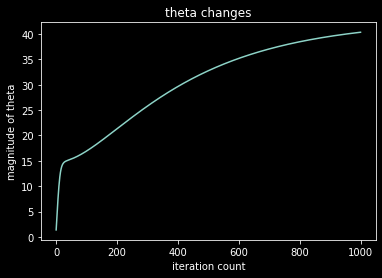

In [110]:
x_train, y_train = train.iloc[:10+(4*10), :6], train.iloc[:10+(4*10), 6]
np_X = x_train.to_numpy()
np_X_TEST = x_test.to_numpy()
gradien_descent_with_regularization(X=np_X.T, X_TEST=np_X_TEST, degree=5, iteration_count=1000, error_function='RMSE', reg_lambda=0.1)